In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Gambler:
    def __init__(self):
        self.max_capital = 100
        self.ph = 0.40
        self.gamma = 1.0
        self.pt = 1-self.ph
        self.win_rew = 1.0

In [3]:
def exp_rew(env, v, state, action):
    if action < 0 or action > min(state, env.max_capital - state):
        raise Exception("Incorrect action: {} for state: {}".format(action, state))

    rew = 0.0
    if state + action == env.max_capital:
        rew += env.ph * (env.win_rew + env.gamma*v[state + action])
    else:
        rew += env.ph * env.gamma*v[state + action]
    
    rew += env.pt * env.gamma*v[state - action]

    return rew

In [4]:
def value_iter(env, theta = 1.0):
    v = np.zeros(env.max_capital+1)
    v_old = np.empty_like(v)
    states = range(1,env.max_capital)

    sweep = 1

    while True:
        # print("\nSweep {}\n".format(sweep))
        
        delta = 0.0
        np.copyto(v_old, v)
        for state in states:
            actions = range(min(state, env.max_capital - state)+1)
            max_rew = 0.0

            for action in actions:
                rew = exp_rew(env, v_old, state, action)
                if rew > max_rew:
                    max_rew = rew
            
            v[state] = max_rew
            delta = max(delta, abs(v[state] - v_old[state]))

        # print("delta: {}".format(delta))

        if delta < theta:
            break

        sweep += 1
    
    print("Total sweeps: {}".format(sweep))
    return v

In [5]:
def policy(env, v):
    pi = np.zeros(env.max_capital + 1, dtype = np.int8)
    states = range(1,env.max_capital)[::-1]

    for state in states:
        # print("\nstate: {}\n".format(state))
        actions = range(1,min(state, env.max_capital - state)+1)
        max_rew = 0.0
        max_action = 0

        for action in actions:
            rew = exp_rew(env, v, state, action)
            # print("action: {}\t expected reward: {}".format(action, rew))
            if rew > max_rew:
                max_rew = rew
                max_action = action
        
        pi[state] = max_action
    
    return pi

Total sweeps: 34


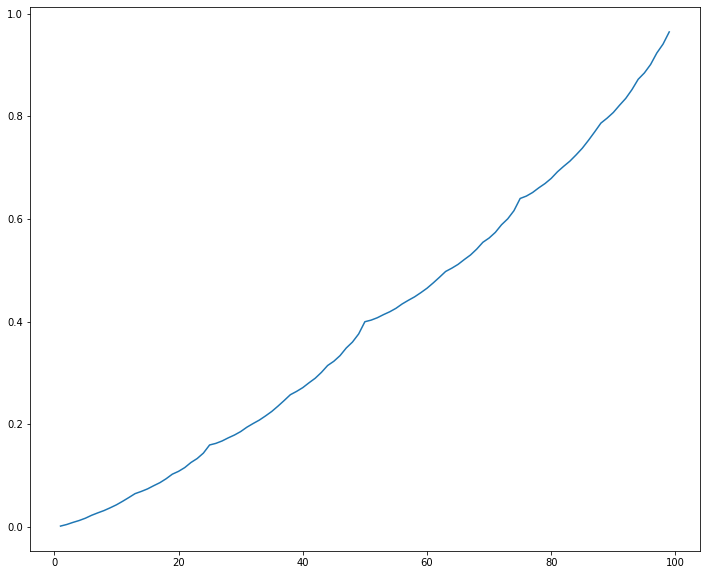

In [6]:
env = Gambler()
states = np.array(range(env.max_capital+1))
v = value_iter(env, theta=0.0000000001 )

fig = plt.figure(figsize=(12,10))
ax = sns.lineplot(x = states[1:-1], y = v[1:-1])
plt.draw()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 11, 15,  9,
        8,  7,  6,  5,  4, 22,  2,  1, 25,  1,  2,  3,  4, 20,  6,  7,  8,
        9, 10, 11, 12, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 50,
        1,  2,  3, 46,  5, 44,  7, 42,  9, 10, 39, 12, 37, 14, 15, 16, 17,
       18, 31, 20,  4,  3,  2, 26, 25,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int8)

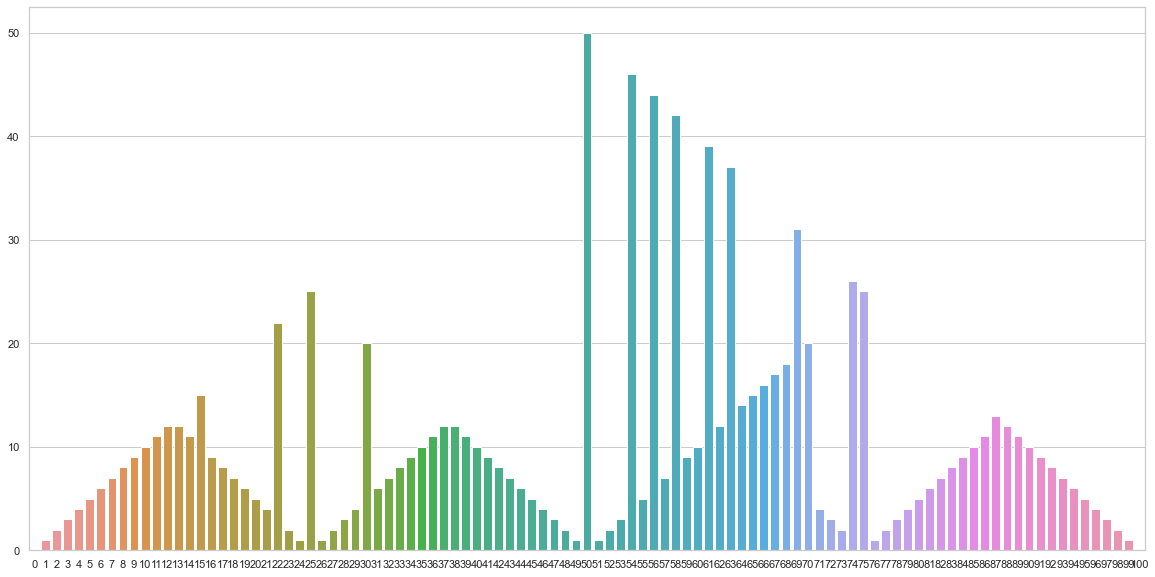

In [7]:
pi = policy(env, v)

sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x = states, y = pi)
plt.draw()
pi